# IMDB 5000 Movie Data set

**Task:** Build a movie recommendation system using the given data set.

Link to data set
https://www.kaggle.com/carolzhangdc/imdb-5000-movie-dataset

### Dataset Information

This Notebook contains various movies and their IMDB information. They are as follows:-

|**Feature**|**Description**|
|----|----|
|color|It contains the information whether the movies are coloured or black and white.|
|director_name|It contains the name of the director for that movie.|
|num_critic_for_reviews|Number of critic for reviews of that movie.|
|duration|This feature has the duration of the movie.|
|director_facebook_likes|Number of likes of the Director on his/her Facebook Page.|
|actor_3_facebook_likes|Number of likes of the Actor_3 on his/her Facebook Page.|
|actor_2_facebook_likes| Number of likes of the Actor_2 on his/her Facebook Page.|
|actor_1_facebook_likes|Number of likes of the Actor_1 on his/her Facebook Page.|
|gross| The Gross amount for the movie.|
|genres|The genre og the movie.|
|actor_1_name|Name of the 1st actor.|
|movie_title|Title/Name of the movie.|
|num_voted_users|Number of users who voted for the movie.|
|cast_total_facebook_likes|Total Facebook likes for the cast of the movie.|
|actor_2_name|Name of the 2nd actor.|
|actor_3_name|Name of the 3rd actor.|
|facenumber_in_poster|Number of posters on the Facebook.|
|plot_keywords|Keywords that can be used to identify the plots in the movie.|
|movie_imdb_link|The IMDB link of that movie.|
|num_user_for_reviews|Number of users who wrote reviews.|
|language|Language of the movie.|
|country|Country in which the movie was made.|
|content_rating|Rating of the content of the movie.|
|budget|Budget used for making the movie.|
|title_year|The year in which title of the movie was launched.|
|imdb_score|The IMBD score or rating for the movie.|
|aspect_ratio|It is the ratio of width to height of the scenes in that movie.|
|movie_facebook_likes|Number of likes for that movie on Facebook.|

## Importing necessary libraries
The following code is written in Python 3.x. Libraries provide pre-written functionality to perform necessary tasks.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df= pd.read_csv('../input/imdb-5000-movie-dataset/movie_metadata.csv')
df.head()

In [ ]:
# Now let us check for the shape of the dataset and also that are any null values present in our dataset.
# For that,

print('shape of the dataset=', df.shape)

print(' \nThe null count of each column of the dataset are as follows:')
df.isnull().sum()

- This tells us there are many null values present in our dataset. 

In [ ]:
df.info()  # Information of the dataset, in terms of shape of dataset,name , type and non null values wrt each column.

## Exploratory Data Analysis

#### 1. Color of the movies

In [ ]:
df['color'].value_counts()

In [ ]:
sns.countplot(df['color'])

- We can see that 4815 movies are colored. Others are Black and white.

#### 2. Genres of the movie (Top 10)

In [ ]:
df['genres'].value_counts().head(10)

In [ ]:
plt.figure(figsize=(15,10))
df['genres'].value_counts()[0:10].plot.bar()

- From the plot above, we can say that the movies with `Drama` genre is the most in our dataset.

#### 3. Languages in which the movies are made.

In [ ]:
df['language'].value_counts()

In [ ]:
plt.figure(figsize=(15,10))
df['language'].value_counts()[0:10].plot.bar()

- We can observe that majority of the movies are in `English` language, followed by `French`, `Spanish` and `Hindi`.

#### 4. Country of the movie

In [ ]:
df['country'].value_counts()

In [ ]:
plt.figure(figsize=(15,10))
df['country'].value_counts()[0:10].plot.bar()

- We can conclude that majority of the movies in our dataset are made in `USA`.

In [ ]:
df['imdb_score'].mean()

- From the above output, we can see that the average IMDB rating of the movie is 6.44, on a scale from 1-10.

In [ ]:
df['movie_title'].value_counts()[0:10]

#### 5. The year when maximum movies were released

In [ ]:
df['title_year'].value_counts().head(10)

In [ ]:
df['title_year'].fillna(0,inplace=True)

In [ ]:
df['title_year'] = df['title_year'].apply(np.int64)

In [ ]:
plt.figure(figsize=(15,10))
df['title_year'].value_counts()[0:10].plot.bar()

- From here, we can see that maximum movies were released in the year `2009`, according to our dataset.

## Movie Recommendation System

### 1. Simple Recommender System (based on IMDB rating)

In [ ]:
#Sort movies based on score calculated above
df2 = df.sort_values('imdb_score', ascending=False)

#Print the top 20 movies
df2[['movie_title', 'title_year', 'director_name', 'genres', 'language', 'imdb_score']].head(20)

The above is a very simple Movie Recommender System. Here, the `IMDB rating` of the movie is taken into account and recommendation is made, based on that. According to this:

- `Towering Inferno` has the highest rating og 9.5/10 & it is an English comedy movie.
- Then follows `The Shawshank Redemption`, `The Godfather` and so on.

### **2. Content based Recommender System**

#### Creating a separate dataset for the recommender system:

In [ ]:
dataset= df[['director_name','actor_2_name','genres','title_year','actor_1_name','movie_title','actor_3_name']]

In [ ]:
dataset.head()

#### Formatting the `genres` and `movie_title` columns in the dataset:

In [ ]:
dataset['genres']

In [ ]:
## clean genres--- remove | between generes
dataset['genres'] = dataset['genres'].apply(lambda a: str(a).replace('|', ' '))
dataset['genres']

In [ ]:
dataset['movie_title'][0]

In [ ]:
dataset['movie_title'] = dataset['movie_title'].apply(lambda a:a[:-1])
dataset['movie_title'][0]

#### Combined features on which we will calculate cosine similarity:

In [ ]:
## combined features on which we will calculate cosine similarity

dataset['director_genre_actors'] = dataset['director_name']+' '+dataset['actor_1_name']+' '+' '+dataset['actor_2_name']+' '+dataset['actor_3_name']+' '+dataset['genres']

In [ ]:
dataset.head()

In [ ]:
dataset.fillna('', inplace=True)

In [ ]:
dataset.isnull().sum()

**I will be using the `cosine similarity` to calculate a numeric quantity that denotes the similarity between two movies. I use the cosine similarity score since it is independent of magnitude and is relatively easy and fast to calculate. Mathematically, it is defined as follows:**

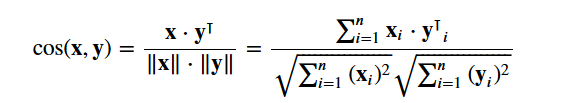

#### vectorizing and then calculating cosine similarity:

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

vec = CountVectorizer()
vec_matrix = vec.fit_transform(dataset['director_genre_actors'])

similarity = cosine_similarity(vec_matrix)

In [ ]:
def recommend_movie(movie):
    if movie not in dataset['movie_title'].unique():
        return('Sorry! The movie you requested is not in our database. Please check the spelling or try with some other movies')
    else:
        i = dataset.loc[dataset['movie_title']==movie].index[0]
        lst = list(enumerate(similarity[i]))
        lst = sorted(lst, key = lambda x:x[1] ,reverse=True)
        lst = lst[1:11] # excluding first item since it is the requested movie itself
        l = []
        year=[]
        for i in range(len(lst)):
            a = lst[i][0]
            l.append(dataset['movie_title'][a])
            year.append(dataset['title_year'][a])
            
        plt.figure(figsize=(10,5))
        plt.bar(l, [i[1] for i in lst])
        plt.xticks(rotation=90)
        plt.xlabel('Movies similar to → '+movie, fontsize=12,fontweight="bold")
        plt.ylabel('cosine scores', fontsize=12,fontweight="bold")
        plt.show()
        df2 = pd.DataFrame({'Movies Recommended':l, 'Year':year})
        df2.drop_duplicates
        return df2

In [ ]:
dataset['movie_title'].sample(10)

In [ ]:
recommend_movie('The Kids Are All Right')

In [ ]:
recommend_movie('The Godfather')

In [ ]:
recommend_movie('Avatar')

In [ ]:
recommend_movie('The Dark Knight Rises')

In [ ]:
recommend_movie("Pirates of the Caribbean: At World's End")

In [ ]:
dataset['movie_title'].value_counts()

In [ ]:
recommend_movie("The Fast and the Furious")

In [ ]:
recommend_movie('Fight Club')

## Yayy!! The Recommender System works. 😀

## Please upvote my work if you like it. Thankyou!! 